In [13]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline

In [14]:
import sys
sys.path.append('../')
import models
import models.logreg

In [24]:
%load_ext autoreload
%autoreload 1

In [63]:
# prefix='../runs_logreg/dmom,lr_0.01,dmom_0.,mom0.9/'
# prefix='../runs_logreg/dmom,lr_0.01,dmom_0.5,mom0.9_sampler/'
# prefix='../runs_logreg/dmom,lr_0.01,dmom_0.5,mom0.9/'
# prefix='../runs_logreg/dmom,lr_0.01,dmom_0.5,mom0.9_ggbar/'
# prefix='../runs_logreg/dmom,lr_0.01,dmom_0.5,mom0.9_loss/'
# prefix='../runs_logreg/0_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_one,alpha_norm_sum,weight_decay_0/'
prefix='../runs_logreg/19_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_normg,alpha_norm_none,weight_decay_0.0005/'
prefix='../runs_logreg/21_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_none,weight_decay_0.0005/'
prefix='../runs_logreg/9_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_sum,weight_decay_0.0005/'
prefix='../runs_logreg/X/'

In [64]:
data=torch.load(prefix+'data.pth.tar')

In [65]:
X, Y, Xt, Yt, C = data

In [66]:
X.shape

(2, 640)

In [67]:
num = X.shape[1]

In [68]:
# sample = np.random.choice(num, 1000, replace=False)
sample = np.arange(num)

In [69]:
data=torch.load(prefix+'model.pth.tar')
state_dict = data['model']
fnorm = data['fnorm']
weights = data['weights']
alpha = data['alpha']
normg = data['normg']

In [70]:
C.shape

(2, 2)

In [71]:
model = models.logreg.Linear(C.shape[0], C.shape[1])
model.load_state_dict(state_dict)

In [849]:
x = np.linspace(X[0].min(), X[0].max(), 100)
y = np.linspace(X[1].min(), X[1].max(), 100)
px, py = np.meshgrid(x, y)
p = np.vstack((px.flat, py.flat))

In [850]:
Z = np.argmax(model(Variable(torch.Tensor(p.T))).data.numpy().copy(), axis=1)

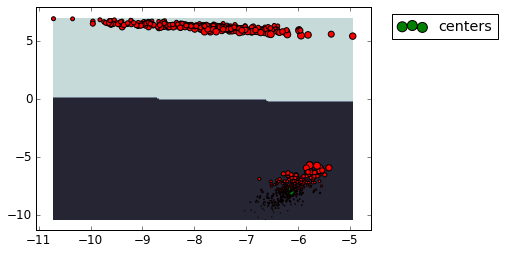

In [851]:
plt.rcParams.update({'font.size': 12})
plt.contourf(x, y, Z.reshape(100, 100), int(Y.max())+1, cmap=plt.cm.bone)
# plt.scatter(C[0, :], C[1, :], c='g', s=100, label='centers')
for i in range(int(Y.max())+1):
    plt.scatter(X[0, sample[Y[sample]==i]], X[1, sample[Y[sample]==i]], c='r', s=normg[Y[sample]==i]/normg.max()*50)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.savefig(prefix+'fig.png', dpi=100, bbox_inches='tight')

(2.4853309241734678e-06, 0.003698759013786912, 0.0013117691851221025, 0.0011751976208223881)
20
20


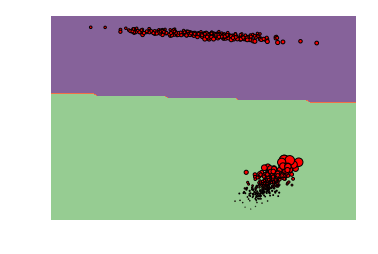

In [142]:
f('../runs_logreg/X/')

In [141]:
def f(prefix):
    prefix = prefix + '/'
    data=torch.load(prefix+'data.pth.tar')

    X, Y, Xt, Yt, C = data

    X.shape

    num = X.shape[1]

    # sample = np.random.choice(num, 1000, replace=False)
    sample = np.arange(num)

    data=torch.load(prefix+'model.pth.tar')
    state_dict = data['model']
    fnorm = data['fnorm']
    weights = data['weights']
    alpha = data['alpha']
    normg = data['normg']
    print(alpha.min(), alpha.max(), np.median(alpha), alpha.mean())

    C.shape

    model = models.logreg.Linear(C.shape[0], C.shape[1])
    model.load_state_dict(state_dict)

    x = np.linspace(X[0].min()-1, X[0].max()+1, 100)
    y = np.linspace(X[1].min()-1, X[1].max()+1, 100)
    px, py = np.meshgrid(x, y)
    p = np.vstack((px.flat, py.flat))

    Z = np.argmax(model(Variable(torch.Tensor(p.T))).data.numpy().copy(), axis=1)

    plt.rcParams.update({'font.size': 12})
    plt.contourf(x, y, Z.reshape(100, 100), int(Y.max())+1, cmap=plt.cm.Paired)
    # plt.scatter(C[0, :], C[1, :], c='g', s=100, label='centers')
    for i in range(int(Y.max())+1):
        print(min(20, 1/alpha[Y[sample]==i].min()))
        plt.scatter(X[0, sample[Y[sample]==i]], X[1, sample[Y[sample]==i]], c='r', s=alpha[Y[sample]==i]/alpha[Y[sample]==i].sum()*3000)
    plt.axis('off')
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.savefig(prefix+'fig.png', dpi=100, bbox_inches='tight')

12_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_none,weight_decay_0
(5.2322150168038206e-08, 0.34096258878707886, 0.0088286390528082848, 0.01522361972129609)
13_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_none,weight_decay_0.0005
(5.1147154067621159e-08, 0.29943943023681641, 0.010348058305680752, 0.022028760738071508)
14_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_sum,weight_decay_0
(9.0196728706359863e-05, 3.0503497123718262, 0.16511081159114838, 0.43614594621892594)
15_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_sum,weight_decay_0.0005
(0.00013351405505090952, 3.4081368446350098, 0.1862395852804184, 0.47865602205229152)
16_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_exp,weight_decay_0
(0.00018640916096046567, 1.6861904859542847, 0.15194503962993622, 0.3455061825262874)
17_dataset_10class,

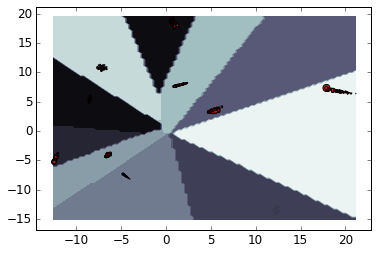

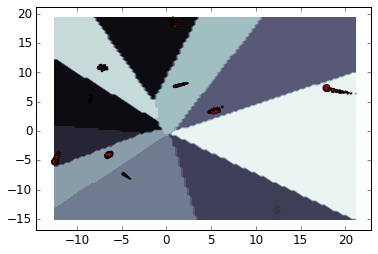

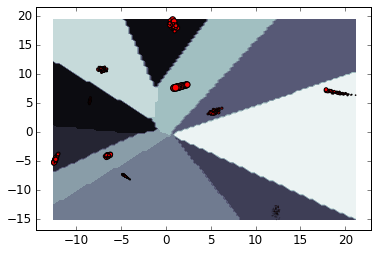

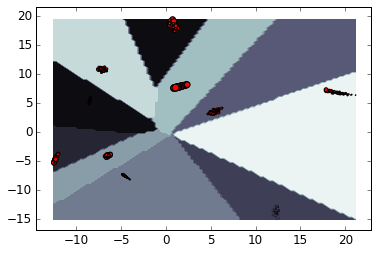

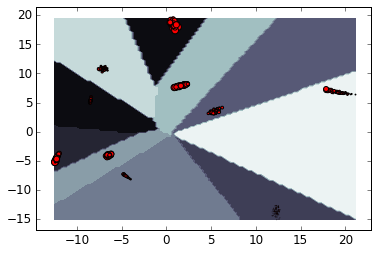

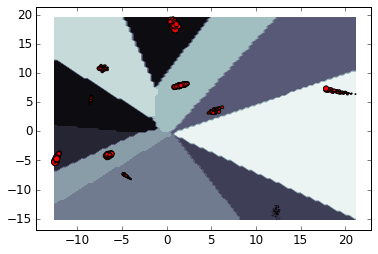

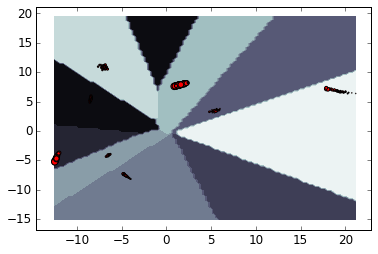

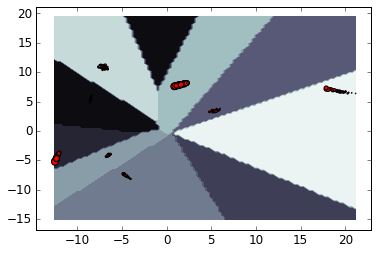

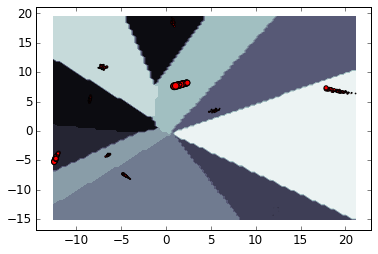

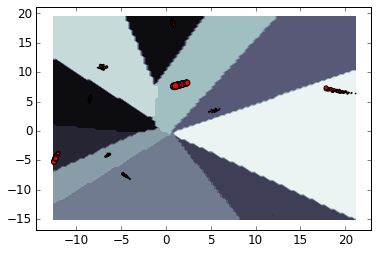

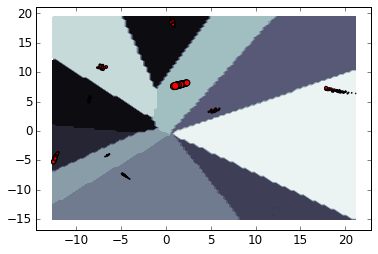

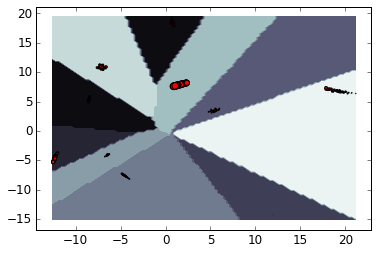

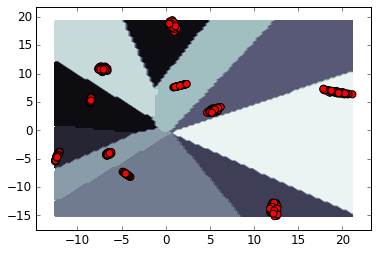

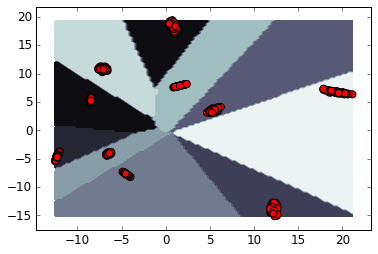

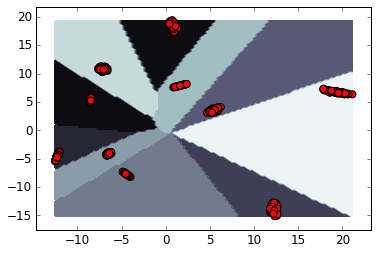

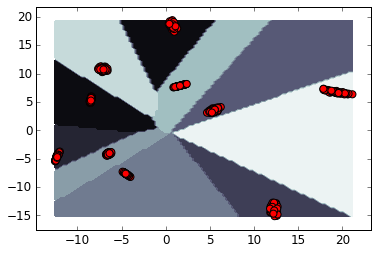

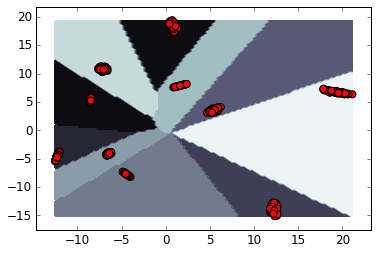

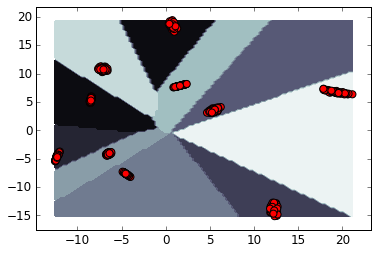

In [12]:
prefixes = [
    '12_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_none,weight_decay_0',
'13_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_none,weight_decay_0.0005',
'14_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_sum,weight_decay_0',
'15_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_sum,weight_decay_0.0005',
'16_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_exp,weight_decay_0',
'17_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_exp,weight_decay_0.0005',
'18_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_max0,alpha_norm_none,weight_decay_0',
'19_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_max0,alpha_norm_none,weight_decay_0.0005',
'20_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_max0,alpha_norm_sum,weight_decay_0',
'21_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_max0,alpha_norm_sum,weight_decay_0.0005',
'22_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_max0,alpha_norm_exp,weight_decay_0',
'23_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_max0,alpha_norm_exp,weight_decay_0.0005',
'0_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_one,alpha_norm_none,weight_decay_0',
'1_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_one,alpha_norm_none,weight_decay_0.0005',
'2_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_one,alpha_norm_sum,weight_decay_0',
'3_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_one,alpha_norm_sum,weight_decay_0.0005',
'4_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_one,alpha_norm_exp,weight_decay_0',
'5_dataset_10class,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_one,alpha_norm_exp,weight_decay_0.0005',
]
for p in prefixes:
    print(p)
    plt.figure()
    f('../runs_10class/'+p)

12_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_none,weight_decay_0/
(1.7959044384951994e-07, 6.1422346334438771e-05, 6.7088333253195742e-06, 7.8306807689276781e-06)


/u/faghri/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


13_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_none,weight_decay_0.0005/
(1.5481455761801044e-07, 4.6886008931323886e-05, 5.482511824084213e-06, 6.2218020362436732e-06)
14_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_sum,weight_decay_0/
(2.4790072217228953e-09, 1.5562414773739874e-05, 2.6148313736484852e-06, 4.1585355068360367e-06)
15_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_sum,weight_decay_0.0005/
(5.6213957932982339e-09, 1.2114999663026538e-05, 4.1037826576939551e-06, 3.7721712854987821e-06)
16_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_exp,weight_decay_0/
(2.4801636300253449e-09, 1.5612884453730658e-05, 2.6252664611092769e-06, 4.1731685398338493e-06)
17_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_exp,weight_decay_0.0005/
(5.6200528675276473e-09, 1.2177203643659595e-05, 4.1248126763093751e-06, 3.788469168845

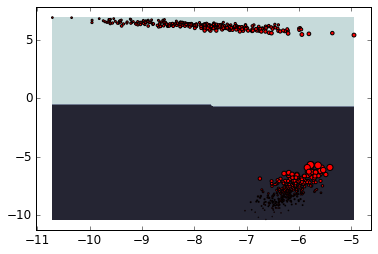

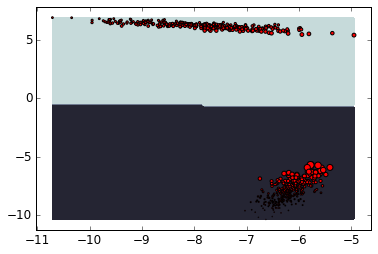

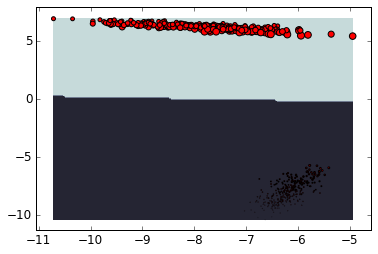

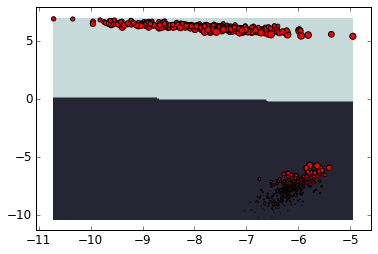

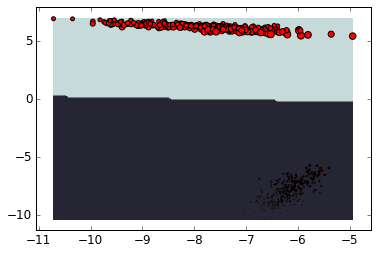

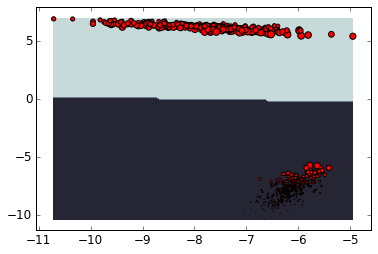

In [8]:
prefixes = [
    '12_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_none,weight_decay_0/',
'13_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_none,weight_decay_0.0005/',
'14_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_sum,weight_decay_0/',
'15_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_sum,weight_decay_0.0005/',
'16_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_exp,weight_decay_0/',
'17_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar,alpha_norm_exp,weight_decay_0.0005/',
]
for p in prefixes:
    print(p)
    plt.figure()
    f('../runs_logreg/'+p)